# Challenge Decision Tree vs. Random Forest with Absenteeism at Work Data #

## by Lorenz Madarang ##

## Data: https://archive.ics.uci.edu/ml/datasets/Absenteeism+at+work ##

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import re
from string import punctuation
from collections import Counter
import operator
from sklearn import linear_model
import statsmodels.formula.api as smf

### Data Ingestion and Data Cleaning ##
I ingested the data from an Excel flat file and then I renamed the columns so that they would be easier to conduct python functions and python methods.  Because Decision Trees and Random Forests work best when the target data type are binary or categorical, I converted the initial target "Absenteeism time in hours" which is a continuous variable into a binary type.  I did this by classifying the amount of absenteeism into "Greater Than a Workday" (8 hours) and "Less Than a Workday" (< 8 hours).  I also removed columns of data that would not help in the model such as the "ID" column.  Also, I removed the "Absenteeism time in hours" column as an input into the models as the Category dataframe which is the target was derived exactly from the "Absenteeism  time in hours" column.  

In [2]:
absentee = pd.read_excel('Absenteeism_at_work.xls')

In [3]:
absentee.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,2


In [4]:
absentee = absentee.rename(index=str, columns = {'ID': 'id',
                                                'Reason for absence' : 'reason_absence',
                                                'Month of absence' : 'month_absence',
                                                'Day of the week' : 'day',
                                                'Seasons' : 'season',
                                                'Transportation expense' : 'transport_expense',
                                                'Distance from Residence to Work' : 'distance_to_work',
                                                'Service time' : 'service_time',
                                                'Age' : 'age',
                                                'Work load Average/day ' : 'workload_average_day',
                                                'Hit target' : 'hit_target',
                                                'Disciplinary failure' : 'discipline_failure',
                                                'Education' : 'education',
                                                'Son' : 'num_children',
                                                'Social drinker' : 'social_drinker',
                                                'Social smoker' : 'social_smoker',
                                                'Pet' : 'pet',
                                                'Weight' : 'weight',
                                                'Height' : 'height',
                                                'Body mass index' : 'bmi',
                                                'Absenteeism time in hours' : 'absentee_hours'})

In [5]:
absentee.head()

,id,reason_absence,month_absence,day,season,transport_expense,distance_to_work,service_time,age,workload_average_day,...,discipline_failure,education,num_children,social_drinker,social_smoker,pet,weight,height,bmi,absentee_hours
0,11,26,7,3,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,2


In [6]:
absentee.drop(['id'], 1, inplace=True)

In [7]:
absentee_cat = []

In [8]:
for i in range(0, 740):
    if absentee['absentee_hours'][i] > 8:
        absentee_cat.append(1)
    else:
        absentee_cat.append(0)

In [11]:
category = pd.DataFrame()

In [12]:
category['absent_category'] = absentee_cat

In [14]:
absentee.head()

,reason_absence,month_absence,day,season,transport_expense,distance_to_work,service_time,age,workload_average_day,hit_target,discipline_failure,education,num_children,social_drinker,social_smoker,pet,weight,height,bmi,absentee_hours
0,26,7,3,1,289,36,13,33,239554,97,0,1,2,1,0,1,90,172,30,4
1,0,7,3,1,118,13,18,50,239554,97,1,1,1,1,0,0,98,178,31,0
2,23,7,4,1,179,51,18,38,239554,97,0,1,0,1,0,0,89,170,31,2
3,7,7,5,1,279,5,14,39,239554,97,0,1,2,1,1,0,68,168,24,4
4,23,7,5,1,289,36,13,33,239554,97,0,1,2,1,0,1,90,172,30,2


In [15]:
absentee.drop(['absentee_hours'], 1, inplace=True)

### Decision Tree ###
For the Decision Tree the inputs into the model were:
    1. reason_absence
    2. month_absence
    3. day
    4. season
    5. transport_expense
    6. distance_to_work
    7. service_time
    8. age
    9. workload_average_day
    10. hit_target
    11. discipline_failure
    12. education
    13. num_children
    14. social_drinker
    15. social_smoker
    16. pet
    17. weight
    18. height
    19. bmi

The target was a binary classification of 0 which noted absentee time "Less Than a Workday" (8 hours) and 1 which noted absentee time "Greater Than a Workday".  I declared that there would be one feature per node and that the max depth of three would be 10 levels.    

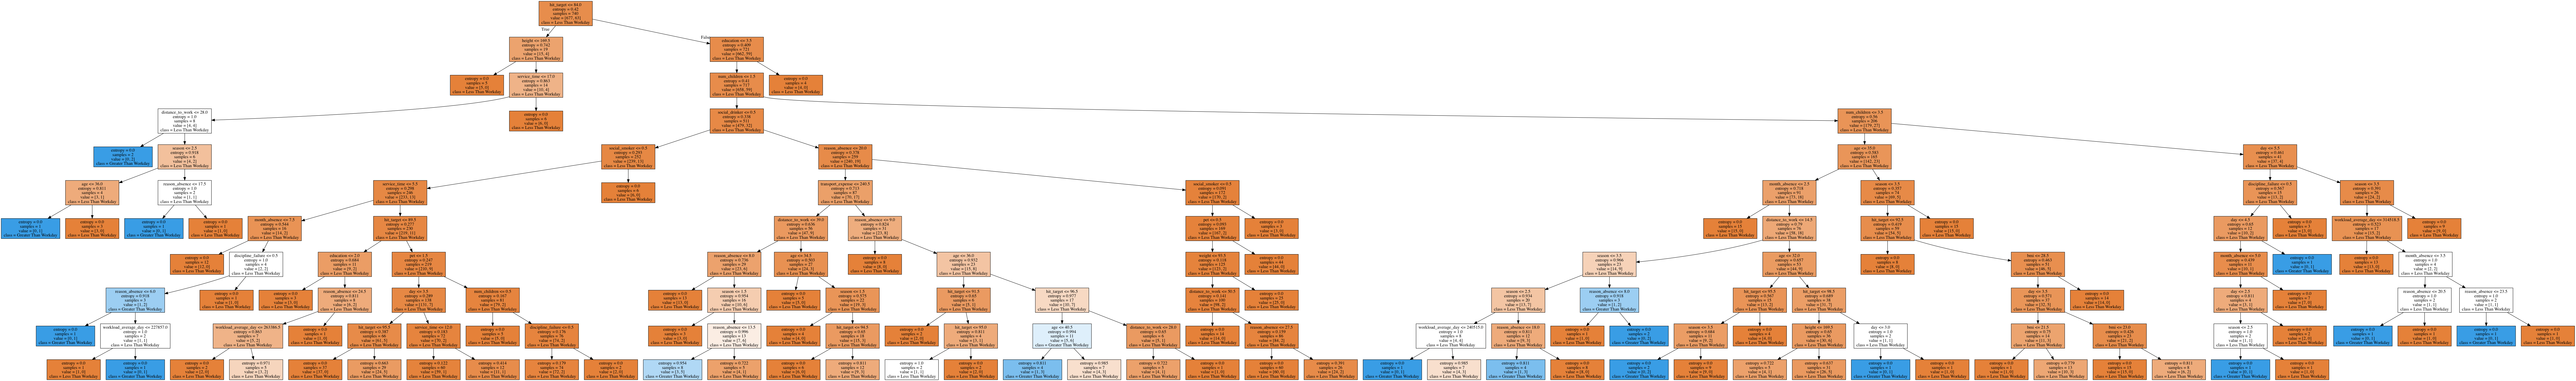

In [19]:
# This is the model we'll be using.
from sklearn import tree

# A convenience for displaying visualizations.
from IPython.display import Image

# Packages for rendering our tree.
import pydotplus
import graphviz

# Initialize and train our tree.
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=10,
)
decision_tree.fit(absentee, category)

# Render our tree.
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=absentee.columns,
    class_names=['Less Than Workday', 'Greater Than Workday'],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

### Random Forest ###
The same data for input and target were the same as the Decsion Tree model.  Initially, I conducted a Random Forest model with a cross validation with 10 folds and got a mean accuracy of .86, which is really good.  The calculation completed very quickly so I cranked up the number of folds to 100 and it was still able to complete relatively quickly.  With a cross validation of 100 folds the Random Forest model was able to get a mean accuracy of about .91.

In [55]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

rfc = ensemble.RandomForestClassifier()
X = absentee
Y = absentee_cat

cross_val_score(rfc, X, Y, cv=10)

array([ 0.92      ,  0.90666667,  0.70666667,  0.81081081,  0.91891892,
        0.82432432,  0.91891892,  0.91780822,  0.91780822,  0.90410959])

In [56]:
score = cross_val_score(rfc, X, Y, cv=10)
print("Mean accuracy is {}".format(score.mean()))

Mean accuracy is 0.8691788226582748


In [50]:
import time

In [51]:
start_time = time.time()

In [52]:
score = cross_val_score(rfc, X, Y, cv=100)

/Users/lorenzmadarang/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:597: Warning: The least populated class in y has only 63 members, which is too few. The minimum number of members in any class cannot be less than n_splits=100.
  % (min_groups, self.n_splits)), Warning)


In [53]:
print("--- %s seconds ---" % (time.time() - start_time))

--- 1.5638549327850342 seconds ---


In [54]:
print("Mean accuracy is {}".format(score.mean()))

Mean accuracy is 0.9058333333333333
